In this session what I'll be doing is load some dummy data, and run the linear regression algorithm that we get from sklearn, and once we do that I want to look at the line that's created. And compare it along with the training data that we gave, how good or bad it fits the data, and then let's see how good or bad it predicts on the testing data as well.

In [1]:
# Load data
# I have already added the file data.csv in same folder as my notebook
import numpy as np

data = np.loadtxt('data.csv', delimiter=",")

In [2]:
data.shape

(100, 2)

By looking at the results of shape of the data we find that there are 100 rows and 2 columns -  first column is x and the second column is y. So I'm taking only one dimensional input and the reason for that is I just want to make sure that we can plot it.

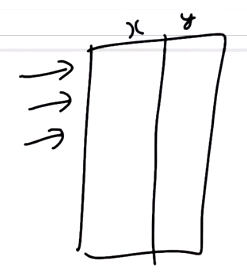

In [3]:
# Split the data to get x and y
x = data[:, 0]
y = data[:, 1]

In [4]:
x.shape

(100,)

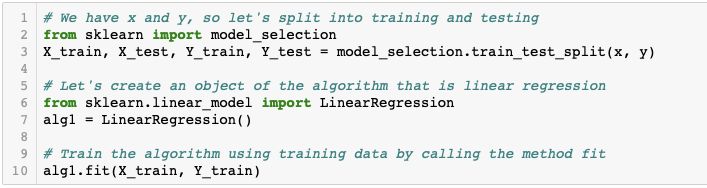

When we run this it's not going to work, its going to give us an error. 

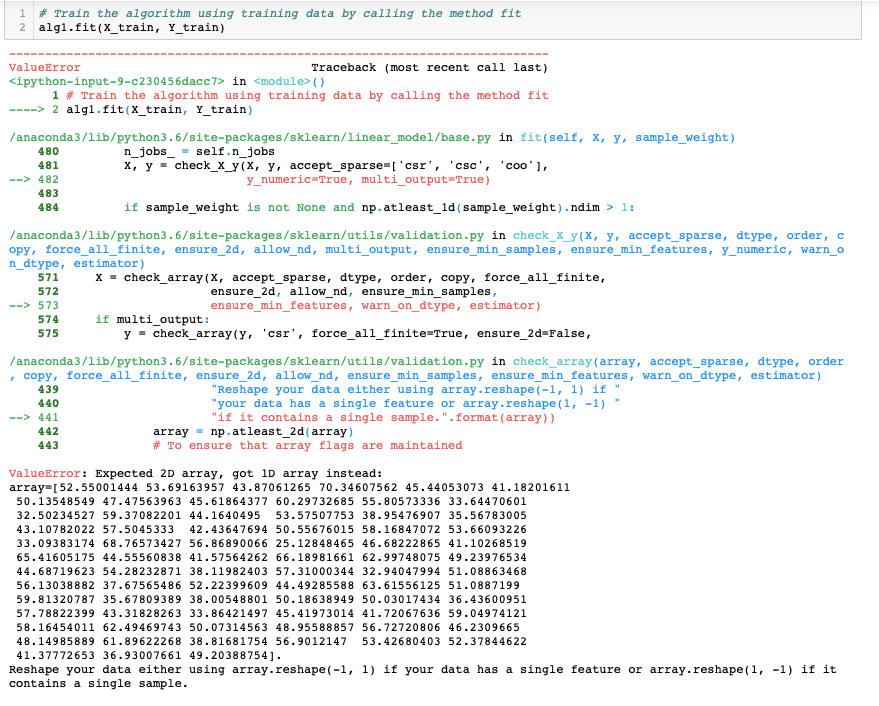

The error it gives us is saying that it wanted a 2D array input but got a 1D array instead. That's true because we gave x which was a 1D array. But it's saying that it wants x to be at least a 2D array. Basically, if you have anything with more than one feature (in most of the cases you will have more than one feature), this is how it wants the data to be.

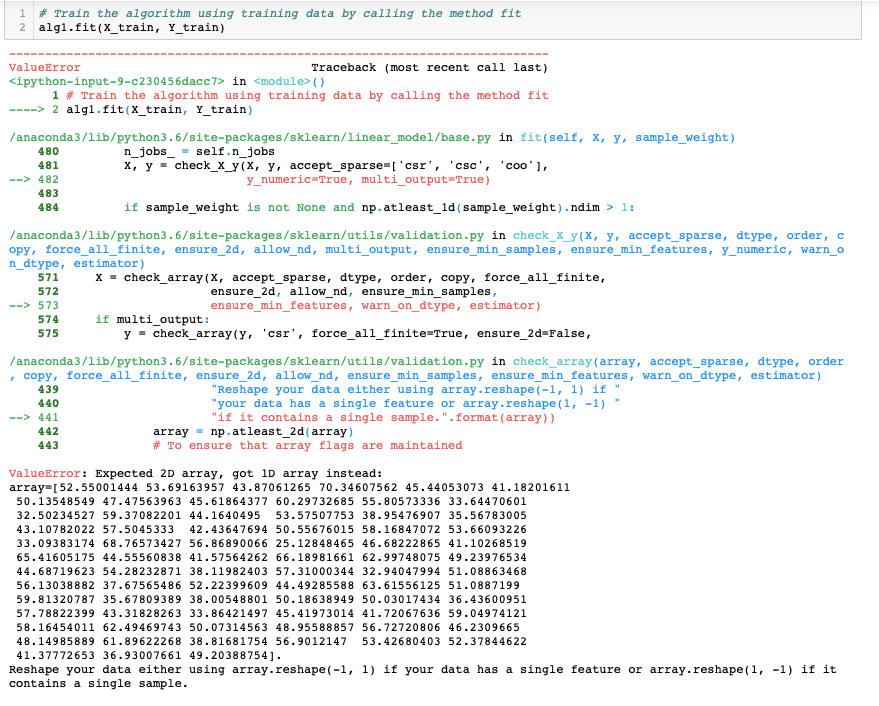

One option that we have is that we can convert this 1D array into a 2D array like as show in the image below.

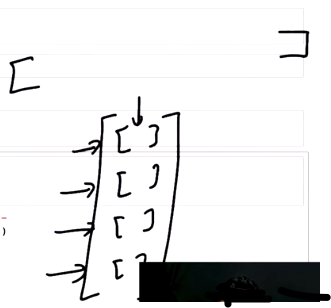

So it looks like you have these rows which have one column.

So there is a function called reshape, so you can reshape your data into some other shape. It's actually giving you a solution in the error stack trace.

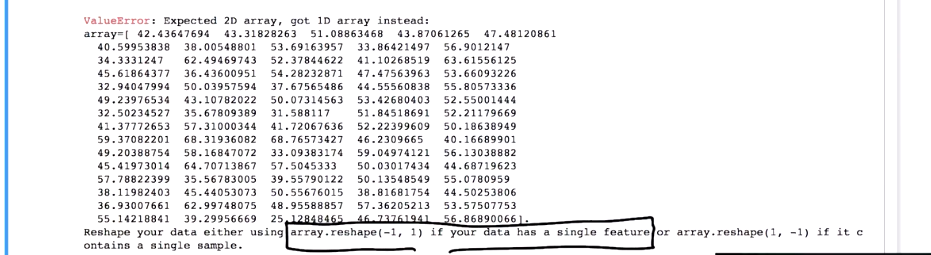

It's saying that if your data has a single feature which is the case with us you can use reshape function. Function reshape(-1, 1) means that it needs 1 column, it will calculate the number of rows by itself.

In [5]:
x = data[:, 0].reshape(-1, 1)
y = data[:, 1]

In [6]:
x.shape

(100, 1)

In [7]:
# We have x and y, so let's split into training and testing
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y)

# Lets create an object of algorithm that is linear regression
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()

# Train the algorithm using training data by calling the method fit
alg1.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This time we were able to fit it. So now that you have fitted what should have happened? Linear regression should have used this data to figure out this line y = mx + c.

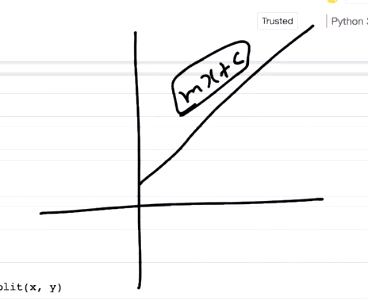

To look at this m and c there is actually a way.

In [8]:
# Find slope m
alg1.coef_

array([1.45513178])

In [9]:
# Find intercept c
alg1.intercept_

2.132490274383784

So this is what it has trained, these are the parameters that it has calculated.

Now let's plot our training data along with these parameters. So what do I want to plot? Let's first figure out that. I want to scatter all my training data points and then I want to draw the line of best fit.
- So there are two things that I want to do. I have two different datasets, effectively datapoints that I want to draw. For the line let's just use m and c to plot it. Let's plot this line somehow and then we will scatter these points and these points will be X_train, Y_train.

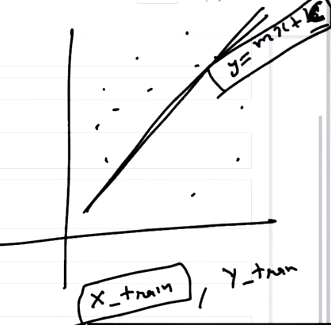

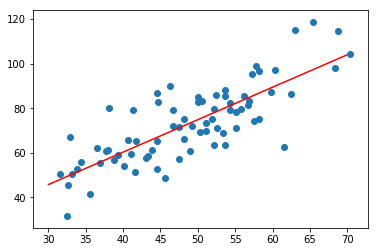

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

m = alg1.coef_[0]
c = alg1.intercept_

x_line = np.arange(30, 70, 0.1)
y_line = m * x_line + c
plt.plot(x_line, y_line, "r")
train_1d = X_train.reshape(75)
plt.scatter(X_train, Y_train)
plt.show()

It seems the best fit line is correct with respect to the training data and the algorithm is doing reasonably well. Let's plot the best fit line for testing data as well.

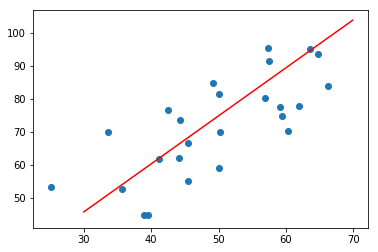

In [11]:
# Let's plot the line for testing data as well.
m = alg1.coef_[0]
c = alg1.intercept_

x_line = np.arange(30,70,0.1)
y_line = m * x_line + c
plt.plot(x_line, y_line, "r")
train_1d = X_test.reshape(25)
plt.scatter(X_test, Y_test)
plt.show()

We used the 75 data points (training data) to learn this line and the idea is that the line should reasonably perform well for the rest of the data (testing data) as well because they're coming from the same data source.